In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso,Ridge,RidgeCV,LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
print(df['Country'].value_counts().sort_values())
print(df['Region'].value_counts().sort_values())
print(df['Happiness Rank'].value_counts().sort_values())

Switzerland    1
Australia      1
Denmark        1
Norway         1
Canada         1
              ..
Rwanda         1
Benin          1
Syria          1
Guinea         1
Togo           1
Name: Country, Length: 158, dtype: int64
North America                       2
Australia and New Zealand           2
Eastern Asia                        6
Southern Asia                       7
Southeastern Asia                   9
Middle East and Northern Africa    20
Western Europe                     21
Latin America and Caribbean        22
Central and Eastern Europe         29
Sub-Saharan Africa                 40
Name: Region, dtype: int64
79     1
10     1
3      1
4      1
5      1
      ..
153    1
154    1
155    1
148    1
82     2
Name: Happiness Rank, Length: 157, dtype: int64


In [6]:
df['Region']=df['Region'].replace({'North America':1,'Australia and New Zealand':2,'Eastern Asia':3,'Southern Asia':4,'Southeastern Asia':5,'Middle East and Northern Africa':6,'Western Europe':7,'Latin America and Caribbean':8,'Central and Eastern Europe':9,'Sub-Saharan Africa':10})
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,7,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,7,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,7,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,7,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,1,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
d=df.drop(columns=['Country'],axis=1)
d

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,10,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,10,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,6,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,10,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


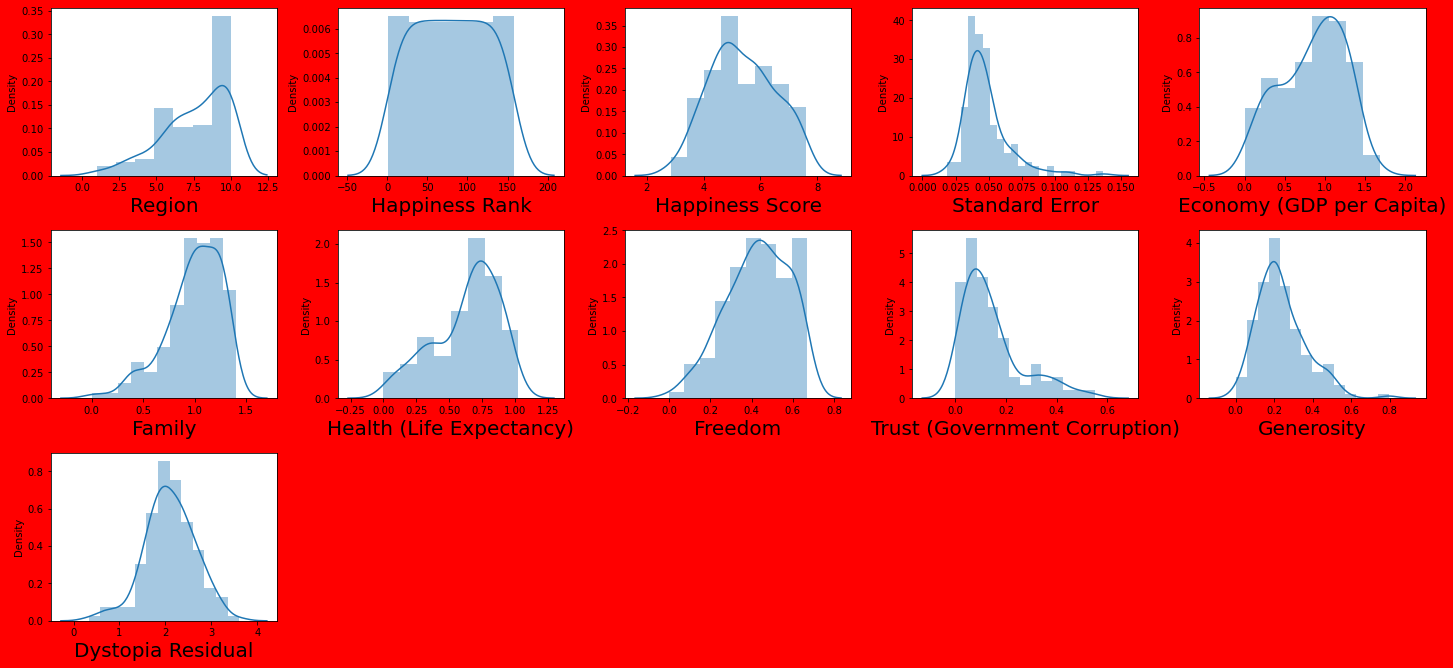

In [9]:
plt.figure(figsize=(20,15),facecolor='red')
plotno=1
for column in d:
    if plotno<=12:
        ax=plt.subplot(5,5,plotno)
        sns.distplot(d[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout() 

<function matplotlib.pyplot.show(close=None, block=None)>

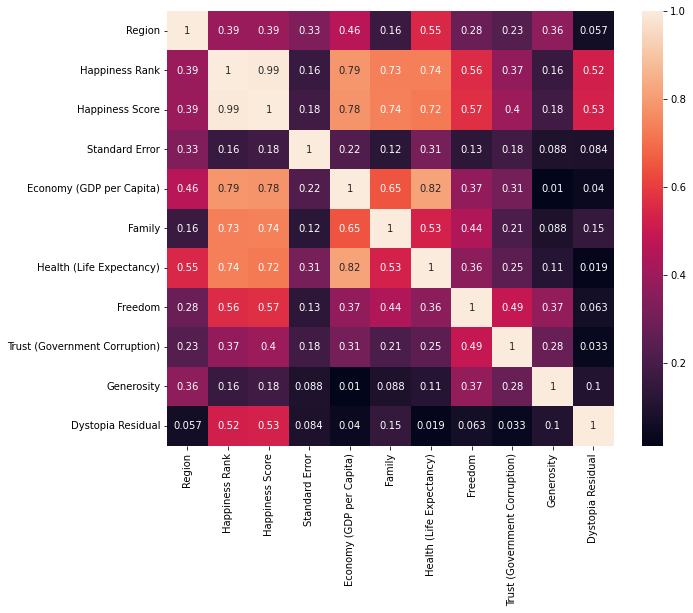

In [10]:
d_corr=d.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(d_corr,annot=True,annot_kws={'size':10})
plt.show

In [11]:
x=d.drop('Happiness Score',axis=1)
y=d['Happiness Score']

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

In [13]:
bestf=SelectKBest(score_func=f_classif,k=10)
fit=bestf.fit(x,y)
d_scores=pd.DataFrame(fit.scores_)
d_columns=pd.DataFrame(x.columns)

In [14]:
feat_score=pd.concat([d_columns,d_scores],axis=1)
feat_score.columns=['Feature_Name','score']
print(feat_score.nlargest(10,'score'))

                    Feature_Name         score
1                 Happiness Rank           inf
7  Trust (Government Corruption)  3.222342e+07
5       Health (Life Expectancy)  1.479332e+02
3       Economy (GDP per Capita)  6.239556e+01
9              Dystopia Residual  1.271234e+01
8                     Generosity  1.247695e+01
2                 Standard Error  1.169937e+01
4                         Family  6.778523e+00
0                         Region  1.101681e+00
6                        Freedom  9.044571e-01


In [15]:
ndf=d[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]
ndf

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [16]:
scal=StandardScaler()
x_sc=scal.fit_transform(ndf)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2,random_state=44)

In [19]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [37]:
print('Score :',reg.predict(scal.transform([[0.20868,0.13995,0.28443,0.36453,0.10731,0.16681]])))

Score : [3.19640908]


In [21]:
reg.score(x_train,y_train)

0.7684313208389572

In [22]:
reg.score(x_test,y_test)

0.7984084650222819

In [23]:
y_pred=reg.predict(x_test)

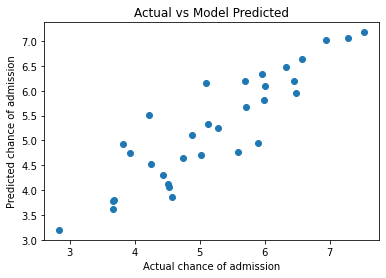

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('Predicted chance of admission')
plt.title('Actual vs Model Predicted')
plt.show()

In [25]:
mean_absolute_error(y_test,y_pred)

0.38548013265494274

In [26]:
mean_squared_error(y_test,y_pred)

0.267032608822264

In [27]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.5167519799887215

In [28]:
from sklearn.linear_model import Lasso,Ridge,RidgeCV,LassoCV
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [29]:
alpha=lasscv.alpha_
alpha

0.0016822621820186876

In [30]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0016822621820186876)

In [31]:
lasso_reg.score(x_test,y_test)

0.7983060421245525

In [32]:
ridgecv=RidgeCV(alphas=np.arange(0.002,0.1,0.02),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.002, 0.022, 0.042, 0.062, 0.082]), normalize=True)

In [33]:
ridgecv.alpha_

0.08199999999999999

In [34]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.08199999999999999)

In [35]:
ridge_model.score(x_test,y_test)

0.7984396668073503

# Ridge is giving highest value

In [81]:
pickle.dump(ridge_model,open('Happiness Score','wb'))

In [82]:
pickle.dump(reg,open('HappinessScore','wb'))